ABALONE DATASET

This dataset was obtained from UCI Machine Learning Repository. A full description of this dataset can be obtained from the website. The objective of this dataset is to predict the age of abalone based on the given eight attributes-sex, length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight. The age is determined by the number of rings. Getting this dataset is expensive since cutting each abalone to measure the ring is an exhaustive and expensive approach. The machine learning process aims to overcome this difficulty by predicting the age of abalone from the aforementioned eight attributes.

The process will mostly involve regression methods. However, classification methods are not rule out as well. This whole document will demonstrate the application of several thorough ML processes, including training and testing, cross-validation, and model evaluation. 

This project does not serve to complement or compete the existing research on this dataset. Rather, it is a demonstration of my personal skills and aptitude on using Scikit-Learn, Pandas, Numpy, and Matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
abalone = pd.read_csv("abalone.data", header=None)
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                  'Whole Weight', 'Shucked Weight', ' Viscera Weight',
                  'Shell Weight', 'Ring']
print(abalone.head())
print(abalone.tail())

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245   
1   M   0.350     0.265   0.090        0.2255          0.0995   
2   F   0.530     0.420   0.135        0.6770          0.2565   
3   M   0.440     0.365   0.125        0.5160          0.2155   
4   I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  
     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

In [4]:
#We have to change the sex, which is a categorical value, 
#to numeric value 0 and 1

abalone['Sex'].replace(['M', 'F', 'I'],[0,1,2], inplace=True)
print(abalone.head())


   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  


In [5]:
# Attribute and target split
X = abalone.drop(['Ring'], axis=1)
y = abalone[['Ring']]
print(X.head())
print(y.head())

   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  
0           0.1010         0.150  
1           0.0485         0.070  
2           0.1415         0.210  
3           0.1140         0.155  
4           0.0395         0.055  
   Ring
0    15
1     7
2     9
3    10
4     7


In [10]:
#convert to array to be passed to numpy

X = np.array(X)
y = np.array(y).ravel()

print(X)
print("-----------------------")
print(y)

[[ 0.      0.455   0.365  ...,  0.2245  0.101   0.15  ]
 [ 0.      0.35    0.265  ...,  0.0995  0.0485  0.07  ]
 [ 1.      0.53    0.42   ...,  0.2565  0.1415  0.21  ]
 ..., 
 [ 0.      0.6     0.475  ...,  0.5255  0.2875  0.308 ]
 [ 1.      0.625   0.485  ...,  0.531   0.261   0.296 ]
 [ 0.      0.71    0.555  ...,  0.9455  0.3765  0.495 ]]
-----------------------
[15  7  9 ...,  9 10 12]


Many machine learning algorithm operates better when the data are preprocessed and scaled to a certain mean and standard deviation of the training set. We shall implement preprocessing on both attributes of the training and testing set.

In [11]:
from sklearn.cross_validation import train_test_split 
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Below is a rundown of several regression algorithms. The plot, which shows the different in between the observed label and predicted label, provides a first glance to its precision-whether it closely matches the observation, which should lie on the red line, or not.

In [ ]:
#REGRESSION

[ -0.40837963   1.93427876   8.54261341   7.17167676   8.03537236
 -18.84303477  -7.91258363   9.66591362]
4.05176714543


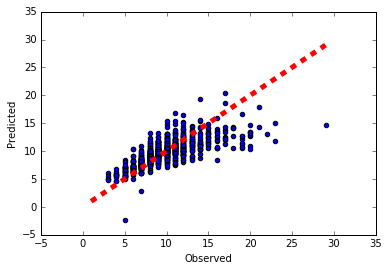

In [87]:
#ref = p. 1649

clf = linear_model.Ridge(alpha = 0.5)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[ -0.39780761  -0.71999851  12.21272885   8.5308387    9.46347657
 -20.47787076 -10.21993925   8.27559859]
3.8985192974
0.536254317413


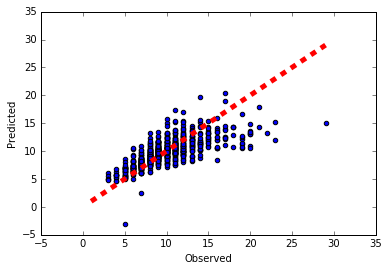

In [63]:
clf = linear_model.Ridge(alpha = 0.0001, fit_intercept=True, solver='svd')
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

print(clf.score(X_test, y_test)) 
#returns the coefficient of determination R^2 of the prediction

Ridge regression imposes a penalty on the size of the coefficient of the OLS. The parameter alpha controls the amount of shrinkage (regularization). A larger value of alpha corresponds to bigger shrinkage.

Below is a plot that shows the each attribute (or feature) and its coefficient as a function of the regularization (alpha). As alpha tends towards zero (to the right), each function's coefficient exhibits big oscillations, demonstrating the big amount of weight each function needs to have to fit into the OLS. 

C:\Users\mdtar001\Anaconda3\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\mdtar001\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(1000000.0, 0.10000000000000001, -4.426116603392158, 4.7999729010991681)

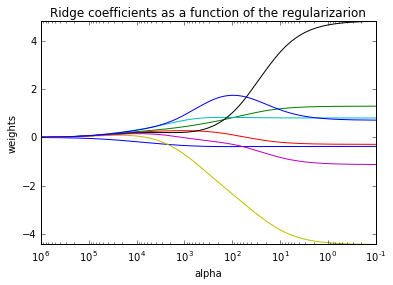

In [13]:
#ridge coefficient as a function of the regularization

alphas = np.logspace(-1, 6, 2000)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_scaled, y)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(loc='best')
plt.title('Ridge coefficients as a function of the regularizarion')
plt.axis('tight')

[-0.30375376 -0.33286043  1.17651013  1.03898773  4.2721639  -4.37105243
 -1.16609175  1.0556589 ]
9.93894043699
-0.181930900884


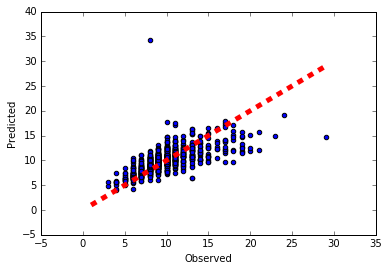

In [96]:
clf = linear_model.Ridge(alpha = 0.0001, fit_intercept=True, solver='svd')
clf.fit(X_train_scaled, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test_scaled)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

print(clf.score(X_test, y_test)) 
#returns the coefficient of determination R^2 of the prediction

In [17]:
#cross-validation with ridgeCV

from sklearn.cross_validation import cross_val_score

ridge = linear_model.Ridge()
scores = cross_val_score(ridge, X_scaled, y, cv=5)
print(scores)
print("mean: ", scores.mean())

[ 0.42187947  0.19384082  0.49149795  0.51727022  0.45017583]
mean:  0.414932857538


In [18]:
#cross-validation with ridgeCV

from sklearn.cross_validation import cross_val_score

ridge = linear_model.Ridge()
scores = cross_val_score(ridge, X_scaled, y, cv=10)
print(scores)
print("mean: ", scores.mean())

[ 0.59415858  0.33510327  0.31612497  0.04676163 -0.09288946  0.49987406
  0.30885105  0.46972219  0.46251694  0.4462243 ]
mean:  0.338644751686


[ -0.40736818   0.          10.4157015    5.62454823   7.8248286
 -18.82252754  -6.23601363   9.77867197]
4.3536737226


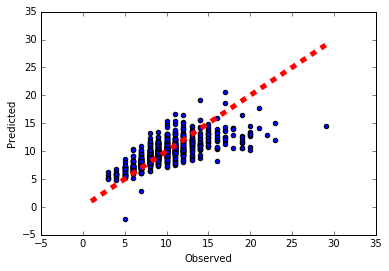

In [33]:
clf = linear_model.ElasticNetCV(l1_ratio=1) #l1 ratio=1 uses L1 penalty
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[ -0.43647845   3.31088981   5.11346759   3.84112298   5.22187865
 -14.18121859  -2.84290142  10.34304601]
4.79967949526


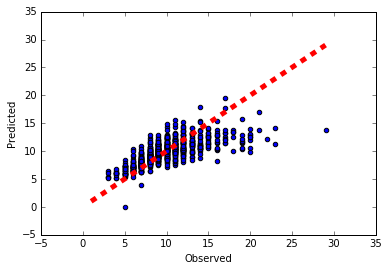

In [34]:
clf = linear_model.ElasticNetCV(l1_ratio=0.5) 
#l1 ratio uses both L1 and L2 penalty
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

Below are the regularization paths of Lasso (L1) and Elastic Net (L2) implemented using a coordinate descent. The coefficient can be forced to be positive. Here we plot the regularization paths of each feature.

computing regularization path using the lasso:
computin regularization path using the positive lasso:
computing regularization path using the elastic net:
computing reg path using the pos enet:


C:\Users\mdtar001\Anaconda3\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


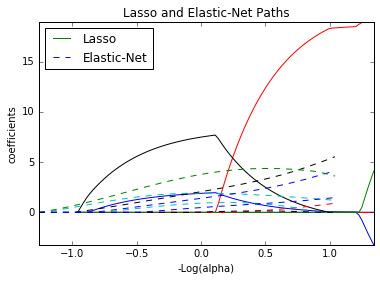

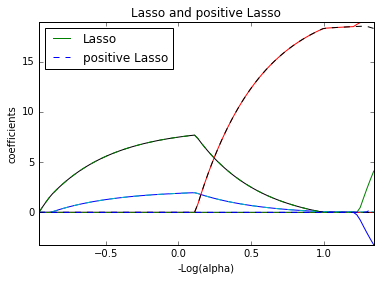

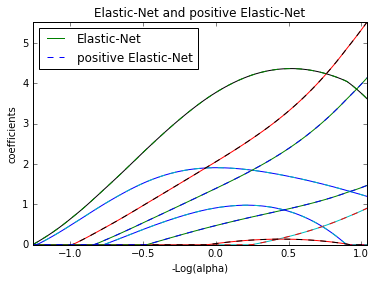

In [91]:
#ref: 0.16.1 p. 787 (It's a dreamliner! Sorry, I'm an aviation geek.)

from sklearn.linear_model import lasso_path, enet_path

eps = 5e-3

print("computing regularization path using the lasso:")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("computin regularization path using the positive lasso:")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
X, y, eps, positive=True, fit_intercept=False)

print("computing regularization path using the elastic net:")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.5,
                                      fit_intercept=False)

print("computing reg path using the pos enet:")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.5,positive=True,fit_intercept=False)

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='best')
plt.axis('tight')

plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
linestyle='--')
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='best')
plt.axis('tight')

plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
linestyle='--')
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
loc='best')
plt.axis('tight')
plt.show()

[ -0.39780452  -0.72108174  12.21416355   8.53116693   9.46385276
 -20.47826813 -10.22052508   8.27516676]
3.8984929004


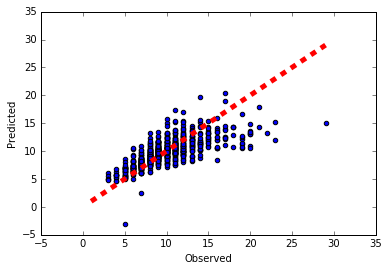

In [35]:
clf = linear_model.Lars(fit_intercept=True)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[ -0.39747597   0.          11.33724425   8.48473102   9.0639548
 -20.08693497  -9.69956494   8.705993  ]
3.87836932286


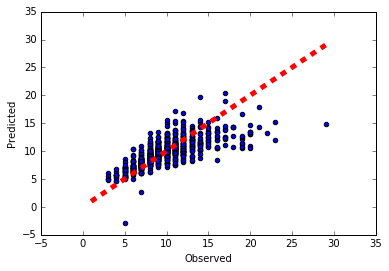

In [36]:
clf = linear_model.LarsCV(fit_intercept=True)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[ -0.41941304   0.          11.83421593   8.65508629   0.         -11.58504052
   0.          19.88957721]
3.70786565006


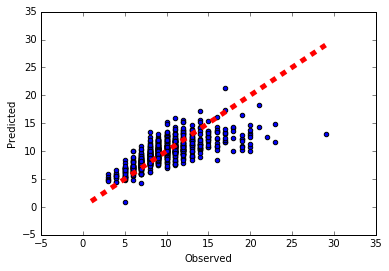

In [39]:
clf = linear_model.OrthogonalMatchingPursuitCV(fit_intercept=True)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[[  3.56449270e-01  -1.21789552e+00  -9.28050141e-01  -3.28013957e-01
   -1.07478726e+00  -4.49423641e-01  -2.16114598e-01  -3.37258960e-01]
 [  6.87086023e-02  -9.70175277e-01  -7.66564430e-01  -2.82252530e-01
   -1.18459597e+00  -4.76915386e-01  -2.55596385e-01  -3.76662192e-01]
 [ -9.97206157e-03  -2.83009057e+00  -2.19403138e+00  -7.72175990e-01
   -3.27282535e+00  -1.40609120e+00  -7.14207776e-01  -9.61892730e-01]
 [  4.52463579e-01  -3.90013795e+00  -3.05440898e+00  -9.43813467e-01
   -5.25503610e+00  -2.46567419e+00  -1.17518238e+00  -1.88116294e+00]
 [  6.92446050e-02  -1.62940554e+00  -1.65102214e+00  -3.75554437e-01
   -4.73998498e+00  -8.68574532e-01  -9.06419758e-01  -2.21074894e+00]
 [ -1.43480243e-01   8.99302016e-01  -1.08111954e-01   5.92947151e-02
   -2.73285917e+00   1.60590414e+00  -7.90338465e-01  -2.94812922e+00]
 [  9.33806350e-02   3.90904746e+00   2.80028414e+00  -4.14527758e-01
   -3.65521614e+00   2.74888281e+00  -5.09010223e-01  -5.16662570e+00]
 [  1.0101086

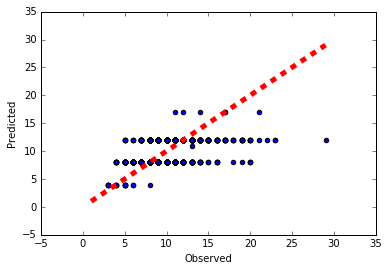

In [41]:
clf = linear_model.PassiveAggressiveClassifier(C=0.5, fit_intercept=True)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[[ -1.89847554e-01  -9.84846590e-01  -7.64897438e-01  -2.95055801e-01
   -1.38365190e+00  -5.27283910e-01  -2.87594605e-01  -4.49635418e-01]
 [ -1.13551154e+00  -1.22676741e+00  -9.65763363e-01  -3.75230335e-01
   -1.98580498e+00  -8.20370680e-01  -4.47836351e-01  -6.18286268e-01]
 [ -2.16980887e-01  -3.11314676e+00  -2.35514813e+00  -8.13152080e-01
   -3.67768259e+00  -1.54329465e+00  -8.35506493e-01  -1.14496795e+00]
 [ -4.59605899e-01  -3.10703040e+00  -2.46853143e+00  -7.67697190e-01
   -5.25751091e+00  -2.24577751e+00  -1.25053594e+00  -1.67894077e+00]
 [ -2.83010735e-02  -1.63285146e-01  -5.46054302e-01   1.51776593e-01
   -6.13402274e+00  -1.59588851e+00  -1.31233321e+00  -2.08352481e+00]
 [ -2.07802766e+00   1.26327536e+00   5.85910353e-01   5.03197786e-01
   -3.17402635e+00   1.31253489e+00  -4.34187392e-01  -3.76955735e+00]
 [ -9.95303727e-01   8.35051030e-01   8.84921904e-01  -7.11349530e-01
   -3.03857163e+00   2.13307090e+00  -4.97604584e-01  -3.43218632e+00]
 [  6.4256609

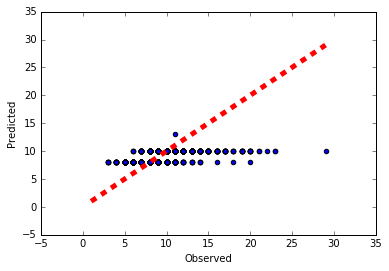

In [45]:
clf = linear_model.Perceptron(penalty='elasticnet', fit_intercept=False, n_iter=5)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[ -0.40861763  -2.5598557    9.31817976  17.96739628  12.42909112
 -24.00872794 -14.59418097   6.9462473 ]
4.51899204523


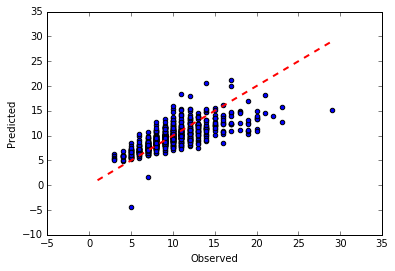

In [48]:
clf = linear_model.TheilSenRegressor(fit_intercept=True)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[-0.37685859 -0.1360549   0.71131027  0.91834679  5.95563757 -5.41018203
 -1.45625251  0.84392584]
9.76019344142


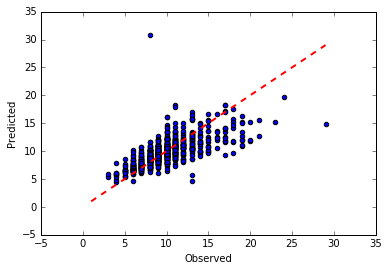

In [97]:
clf = linear_model.TheilSenRegressor(fit_intercept=True)
clf.fit(X_train_scaled, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test_scaled)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

[-0.26932636  2.69062513  2.19163934  0.85593611  2.16543055 -0.53228664
  0.33040517  1.62486494]
[ 5.64178133]


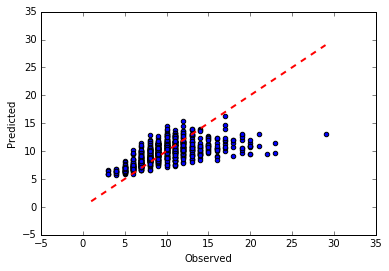

In [49]:
#ref: 0.16.1 p. 1670.

clf = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet',
                               alpha=0.00001)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

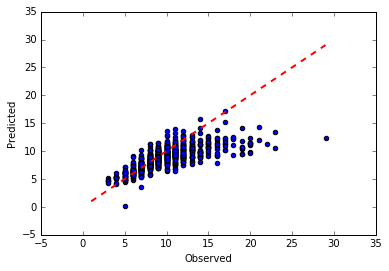

In [54]:
#ref: 0.16.1 p. 1645
#RANdom SAmple Consensus algorithm.

clf = linear_model.RANSACRegressor()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
